In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import musicalrobot

In [2]:
from musicalrobot import edge_detection as ed
from musicalrobot import pixel_analysis as pa
from musicalrobot import post_data

In [3]:
frames = ed.input_file('../musicalrobot/data/10_17_19_DDA_shallow_plate.tiff')

In [4]:
len(frames)

320

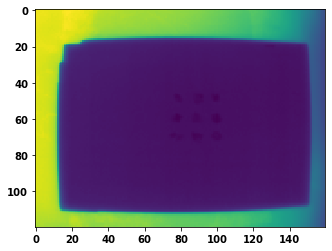

In [5]:
plt.imshow(frames[0])

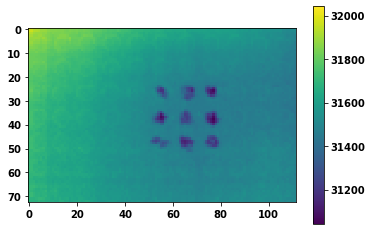

In [6]:
crop_frame = []
for frame in frames:
    crop_frame.append(frame[22:95,23:135])
plt.imshow(crop_frame[50])
plt.colorbar()

In [7]:
flip_frames = ed.flip_frame(crop_frame)

In [8]:
labeled_samples = ed.edge_detection(flip_frames)

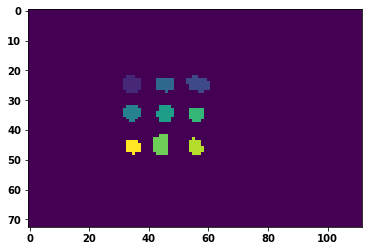

In [9]:
plt.imshow(labeled_samples)

In [10]:
regprops = ed.regprop(labeled_samples, flip_frames, 9, 3, 3)

ValueError: cannot reindex from a duplicate axis

In [15]:
regprops[0]

,Row,Column,Plate,Plate_coord,Area,Perim,Mean Intensity
0,24.0,34.0,31117.0,44.0,31.0,17.656854,31141.0
1,34.0,34.0,31143.0,44.0,28.0,16.485281,30987.0
2,45.0,34.0,31158.0,44.0,20.0,14.242641,31048.0
3,24.0,45.0,31151.0,55.0,25.0,16.828427,31096.0
4,34.0,45.0,31035.0,55.0,29.0,17.656854,31109.0
5,45.0,44.0,31182.0,54.0,32.0,18.828427,31158.0
6,24.0,56.0,31328.0,66.0,33.0,20.485281,31191.0
7,34.0,56.0,31325.0,66.0,23.0,14.828427,31011.0
8,45.0,55.0,31323.0,65.0,22.0,15.071068,31106.0


In [16]:
temp, plate_temp = ed.sample_temp(regprops, flip_frames)

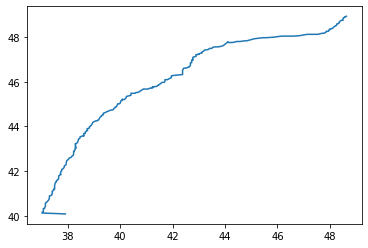

In [26]:
plt.plot(temp[8],plate_temp[8])

In [17]:
inf_temp, s_peaks, p_peaks = ed.inflection_point(temp, plate_temp)

ValueError: zero-size array to reduction operation maximum which has no identity

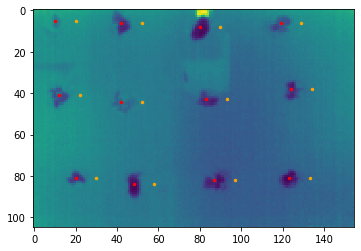

In [10]:
plt.imshow(flip_frames[0])
plt.scatter(regprops[0]['Plate_coord'],regprops[0]['Row'],c='orange',s=6)
plt.scatter(regprops[0]['Column'],regprops[0]['Row'],s=6,c='red')
# plt.title('Sample centroid and plate locations at which the temperature is monitored')